In [1]:
import matplotlib.pyplot as plt 
plt.rcParams.update({
    'font.size': 20,
    'figure.figsize': (12, 6)
})
plt.rc('font', family='arial')

import matplotlib.font_manager as fm
font = fm.FontProperties(family = 'arial')
# e.g., 
# plt.title('Single Component', fontproperties = font)

In [2]:
CONSTRAINT_TOOLS = '/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools'
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-labs/quinlan/data-shared/constraint-tools'

import sys
sys.path.append(f'{CONSTRAINT_TOOLS}/utilities')

## Non-exonic Chen windows, with Gnocchi, and various features (e.g. GC content), and enhancer-overlap status 

In [3]:
import polars as pl

def get_chen_windows(): 
    df = pl.read_csv(
        f'{CONSTRAINT_TOOLS_DATA}/chen-et-al-2023-published-version/41586_2023_6045_MOESM4_ESM/Supplementary_Data_2.features.constraint_scores.bed',
        separator='\t',
    )
    df = df.to_pandas()
    return df 
    
CHEN_WINDOWS = get_chen_windows()
CHEN_WINDOWS

,chrom,start,end,gnocchi,N_observed,window overlaps enhancer,window overlaps merged_exon,B,paternal_recombination_rate,maternal_recombination_rate,...,lambda_M3starHMT6.EUR,GC_content_1000bp,GC_content_10000bp,GC_content_100000bp,GC_content_1000000bp,cpg_island_overlap,window_overlaps_cpg_island,N_mean_null_gnocchi,depletion_rank_constraint_score,depletion_rank_constraint_score_complement
0,chr1,1432000,1433000,4.299894,259,True,False,0.653,0.039046,0.025852,...,2.585568,0.661339,0.641836,0.565094,0.577534,NaN,False,338.059552,0.776961,0.223039
1,chr1,1451000,1452000,0.666316,291,False,False,0.652,0.039046,0.025852,...,2.585568,0.556444,0.552845,0.572894,0.575506,NaN,False,302.590657,0.679834,0.320166
2,chr1,1453000,1454000,0.828398,256,False,False,0.651,0.039046,0.025852,...,2.585568,0.537463,0.561944,0.572564,0.575129,NaN,False,269.601925,0.320987,0.679013
3,chr1,1458000,1459000,-0.086128,272,False,False,0.651,0.039046,0.025852,...,2.585568,0.532468,0.596740,0.570774,0.575225,NaN,False,270.583243,0.718503,0.281497
4,chr1,1463000,1464000,2.948188,191,True,False,0.651,0.039046,0.025852,...,2.585568,0.540460,0.568843,0.576514,0.574420,NaN,False,236.321790,0.170495,0.829505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003222,chr9,137262000,137263000,-2.396149,302,True,False,0.536,0.057053,0.063434,...,2.281162,0.500499,0.542646,0.611944,0.568316,45.0,True,263.131293,0.968399,0.031601
1003223,chr9,137268000,137269000,3.640544,212,True,False,0.536,0.057053,0.063434,...,2.281162,0.552448,0.589941,0.613074,0.567839,NaN,False,272.046527,0.401000,0.599000
1003224,chr9,137269000,137270000,5.276351,209,True,False,0.536,0.057053,0.063434,...,2.281162,0.519481,0.585042,0.613494,0.567623,NaN,False,300.458958,0.282586,0.717414
1003225,chr9,137275000,137276000,2.687348,290,True,False,0.536,1.564889,0.024254,...,2.281162,0.603397,0.639236,0.610484,0.567380,NaN,False,339.517045,0.203953,0.796047


## Non-exonic Halldorsson windows, with Depletion Rank score, and various features (e.g. GC content), and enhancer-overlap status 

In [4]:
def get_halldorsson_windows(): 
    df = pl.read_csv(
        f'{CONSTRAINT_TOOLS_DATA}/depletion_rank_scores/41586_2022_4965_MOESM3_ESM.noncoding.enhancer.BGS.gBGC.GC_content.bed', 
        separator='\t'
    )
    df = df.with_columns((1-pl.col('depletion_rank')).alias('depletion_rank_constraint_score_complement'))
    df = df.to_pandas()
    return df

HALLDORSSON_WINDOWS = get_halldorsson_windows()
HALLDORSSON_WINDOWS

,chromosome,start,end,depletion_rank,enhancer_overlap,window overlaps enhancer,B,B_M1star.EUR,GC_content_1000bp,GC_content_10000bp,GC_content_100000bp,depletion_rank_constraint_score_complement
0,chr1,1382950,1383450,0.637265,500.0,True,0.653,0.108103,0.507492,0.549345,0.580424,0.362735
1,chr1,1383000,1383500,0.696719,500.0,True,0.653,0.108103,0.510490,0.548945,0.580354,0.303281
2,chr1,1383050,1383550,0.856514,500.0,True,0.653,0.108103,0.508492,0.550245,0.580274,0.143486
3,chr1,1383100,1383600,0.848593,499.0,True,0.653,0.108103,0.518481,0.549245,0.580314,0.151407
4,chr1,1383150,1383650,0.940270,449.0,True,0.653,0.108103,0.512488,0.549545,0.580284,0.059730
...,...,...,...,...,...,...,...,...,...,...,...,...
38632861,chr9,137985250,137985750,0.162180,NaN,False,0.536,0.165515,0.578422,0.518648,0.489205,0.837820
38632862,chr9,137985300,137985800,0.103548,NaN,False,0.536,0.165515,0.575425,0.519848,0.489175,0.896452
38632863,chr9,137985350,137985850,0.137103,NaN,False,0.536,0.165515,0.578422,0.520048,0.489265,0.862897
38632864,chr9,137985400,137985900,0.192227,NaN,False,0.536,0.165515,0.581419,0.520548,0.489265,0.807773


## Baseline classifier

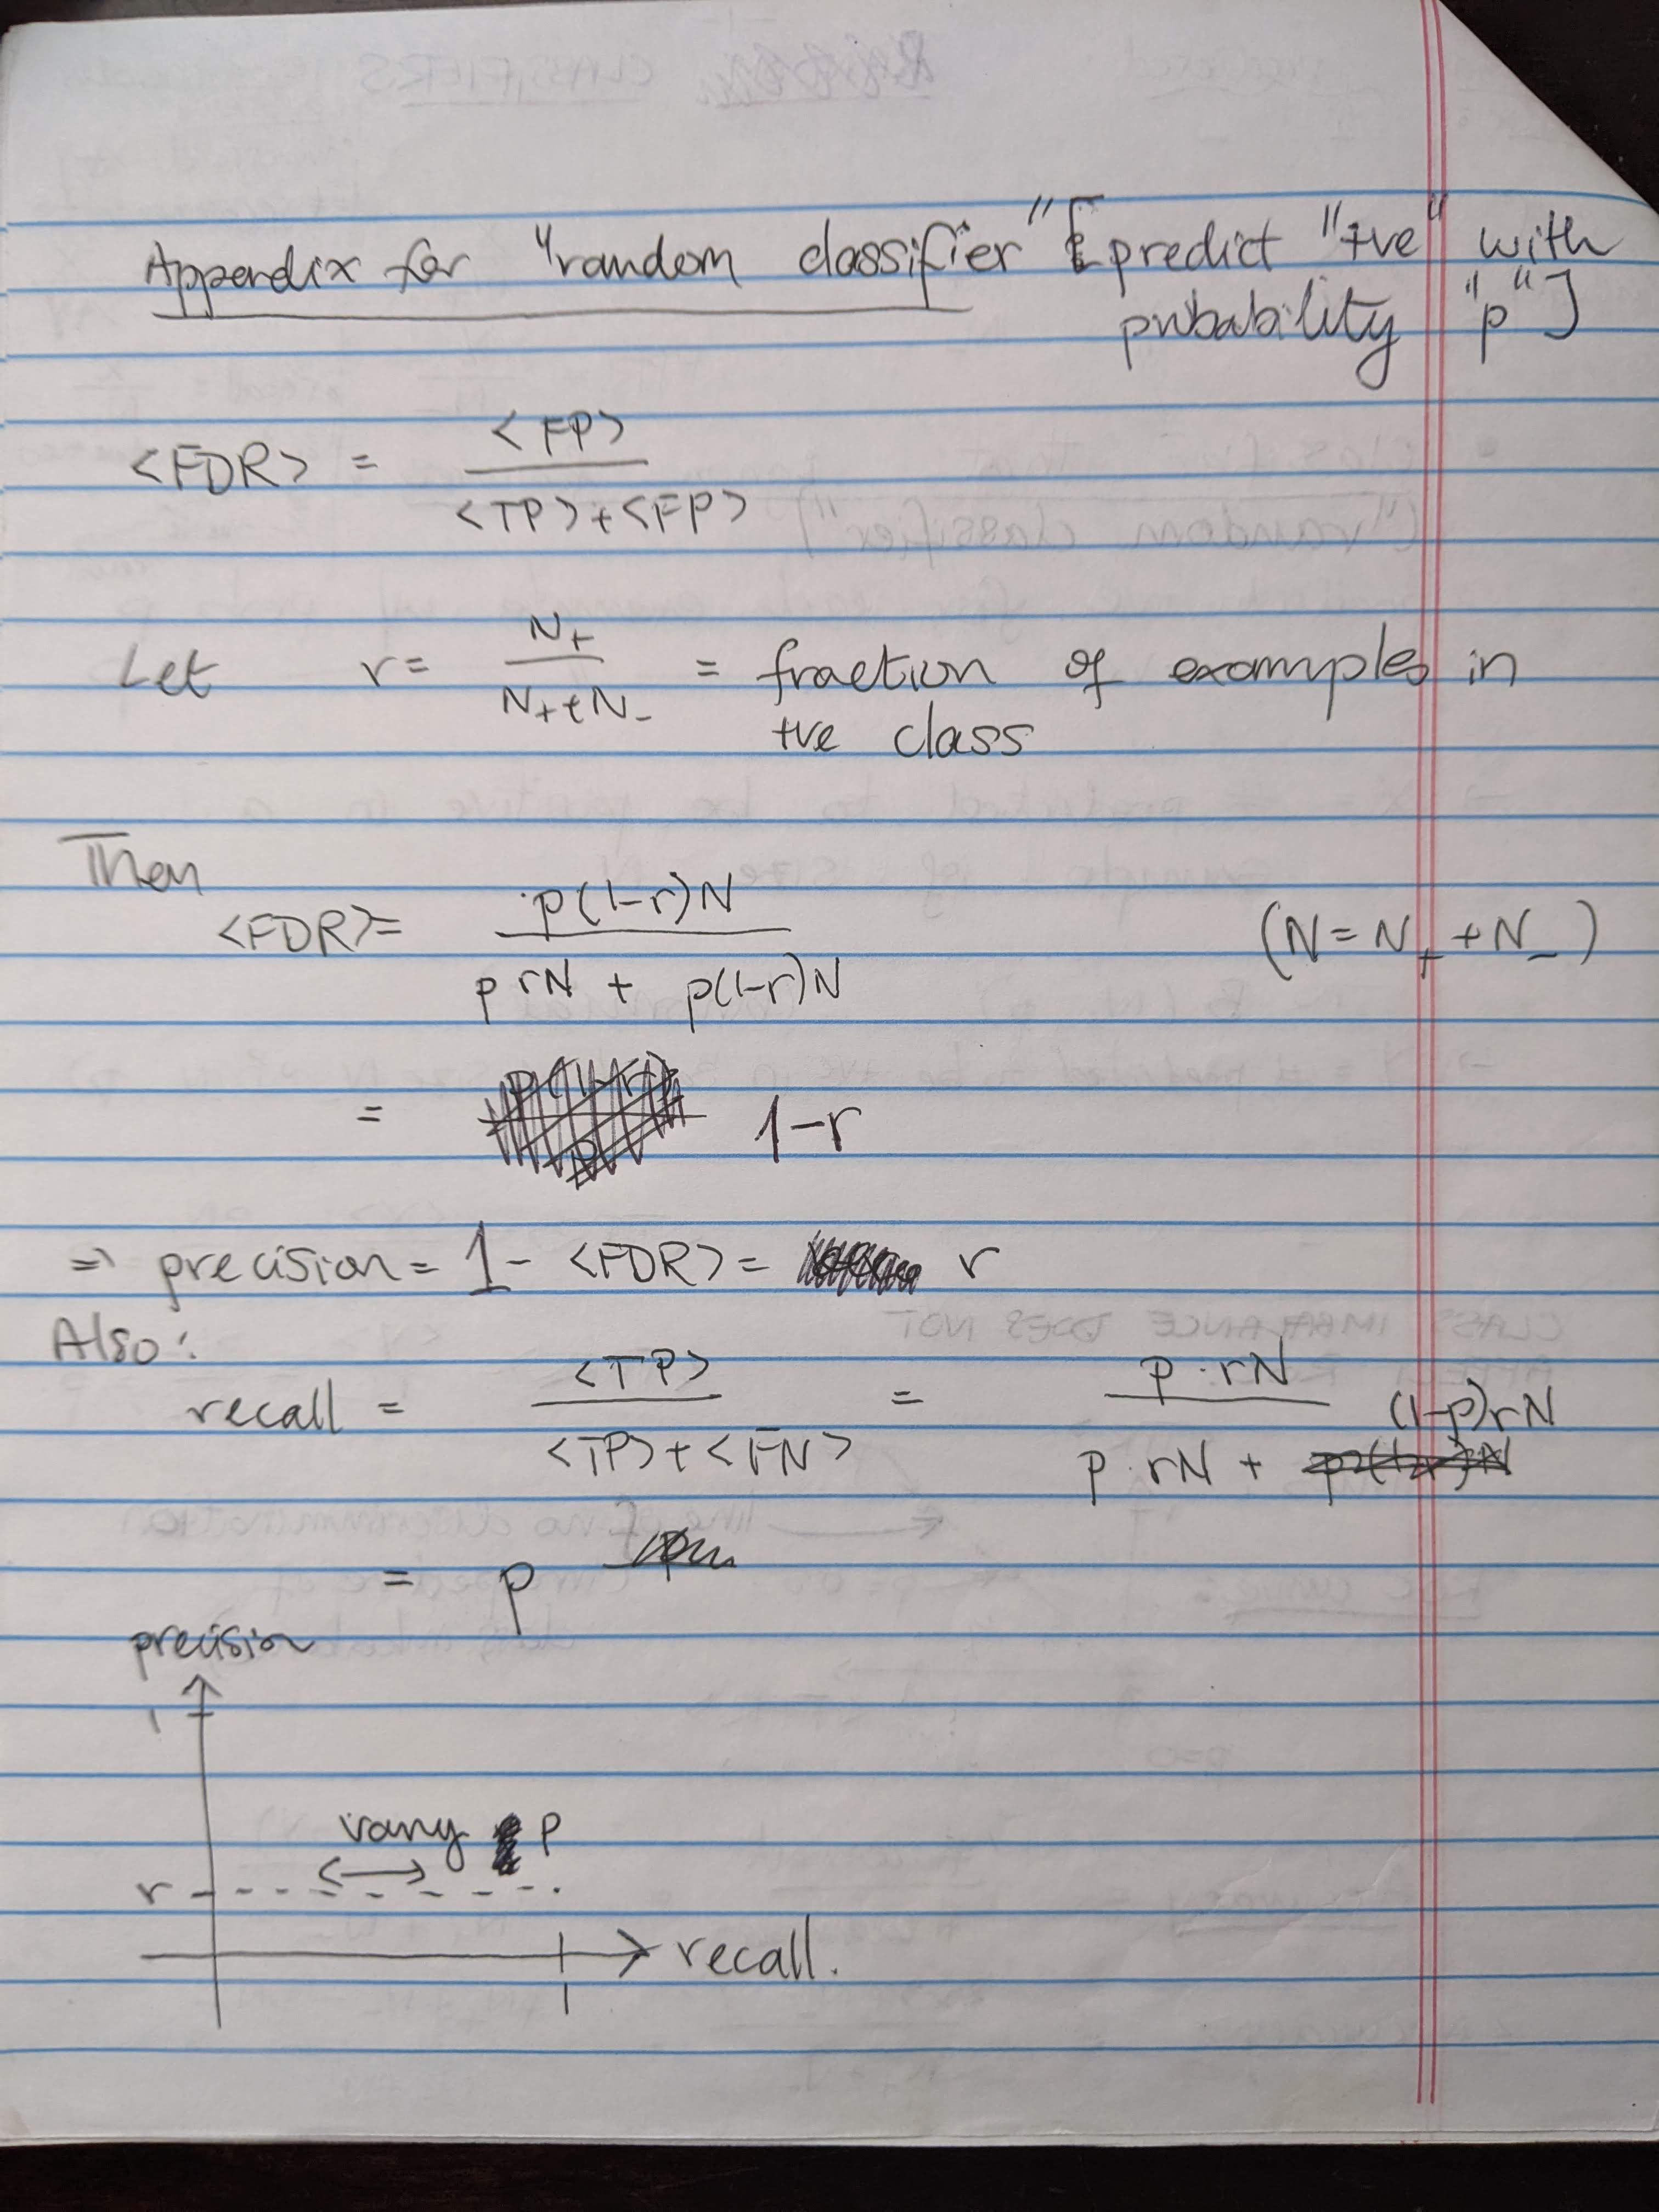

In [5]:
from IPython.display import Image # type: ignore
Image(filename='../precision_recall_random_classifier.jpg', width=600)

## Features that negatively impact a constraint-score-based classifier

In [6]:
import matplotlib.cm as cm
import importlib
import numpy as np

import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

import util
importlib.reload(util)
from util import (
  length_to_string, 
  compute_limits as _compute_limits, 
  slice_feature_space,
  plot_feature_distribution
)

In [7]:
import pandas as pd

def downsample(df, group_columns, target):
  positive_class_sizes = df.groupby(group_columns)[target].apply(lambda ser: ser.value_counts().get(True, 0))
  negative_class_sizes = df.groupby(group_columns)[target].apply(lambda ser: ser.value_counts().get(False, 0))  
  positive_to_negative_ratios = positive_class_sizes/negative_class_sizes
  min_positive_to_negative_ratio = positive_to_negative_ratios.min()

  def downsample_positive_class(group):
    negative_class = group[group[target] == False]
    negative_class_size = len(negative_class)
    positive_class = group[group[target] == True]
    new_positive_class_size = int(min_positive_to_negative_ratio*negative_class_size)
    positive_class_downsampled = positive_class.sample(new_positive_class_size)
    return pd.concat([positive_class_downsampled, negative_class])
  
  df_downsampled = df.groupby(group_columns).apply(downsample_positive_class).reset_index(drop=True)
  return df_downsampled

def preprocess(df, feature, target, number_bins): 
  df = df.copy() 
  df[f'{feature}_bin'] = pd.cut(df[f'{feature}'], bins=number_bins) 
  df = downsample(
    df, 
    group_columns=[f'{feature}_bin'], 
    target=target
  )
  return df 

def get_GC_mean_factor(gc_window_size): 
  if gc_window_size == 1000: 
    return 1
  elif gc_window_size == 1000000:
    return 0.975
  else:
    raise ValueError(f'invalid GC window size: {gc_window_size}')
                     
def get_GC_std_factor(gc_window_size): 
  if gc_window_size == 1000: 
    return 0.3
  elif gc_window_size == 1000000:
    return 0.3
  else:
    raise ValueError(f'invalid GC window size: {gc_window_size}')
  
def compute_center_limits(df, feature, mean_factor, std_factor):
  return _compute_limits(df, feature, mean_factor, std_factor)

def compute_GC_tail_limits(gc_window_size):
  if gc_window_size == 1000: 
    return 0.5, 1.0
  elif gc_window_size == 1000000:
    return 0.440, 1.0
  else:
    raise ValueError(f'invalid GC window size: {gc_window_size}')

def get_GC_feature_lims_label(df, gc_window_size): 
  return ( 
    f'GC_content_{gc_window_size}bp', 
    compute_center_limits(
      df, 
      f'GC_content_{gc_window_size}bp', 
      mean_factor=get_GC_mean_factor(gc_window_size), 
      std_factor=get_GC_std_factor(gc_window_size)
    ), 
    compute_GC_tail_limits(gc_window_size),
    f'GC_content ({length_to_string(gc_window_size)})'
  )

def get_features_and_lims_and_labels(df, gc_window_size, log=False): 
  features_and_lims_and_labels = [
    get_GC_feature_lims_label(df, gc_window_size),
    (
      'B_M1star.EUR', 
      compute_center_limits(
        df, 
        'B_M1star.EUR', 
        mean_factor=1, 
        std_factor=0.3
      ), 
      (0.75, 1.5),
      'gBGC'
    ),
    (
      'B', 
      compute_center_limits(
        df, 
        'B', 
        mean_factor=1, 
        std_factor=0.3
      ), 
      (0.5, 0.55),
      'BGS'
    ),
  ]

  if log: 
    for f, cl, _, _ in features_and_lims_and_labels: 
      print(f'{f}: {cl}')

  return features_and_lims_and_labels 


In [8]:
# this is "r" in the baseline-classifier theory: 
def compute_positive_fraction(df, target):
  value_counts = df[target].value_counts()
  number_negative_examples = value_counts.get(False, 0)
  number_positive_examples = value_counts.get(True, 0)
  return number_positive_examples / (number_negative_examples + number_positive_examples)

(0.212, 0.313]: 43846
(0.212, 0.313]: r = 0.09848104730192035; precision = 0.18839634941329855; precision/r = 1.913021384061021; FDR = 0.8116036505867015; FDR/(1-r) = 0.9002624383632997
(0.313, 0.412]: 466937
(0.313, 0.412]: r = 0.0984800947451155; precision = 0.15816274913162243; precision/r = 1.6060377433731816; FDR = 0.8418372508683776; FDR/(1-r) = 0.9337977408611594
(0.412, 0.512]: 233465
(0.412, 0.512]: r = 0.09847728781616089; precision = 0.1401539262774145; precision/r = 1.4232106649713616; FDR = 0.8598460737225855; FDR/(1-r) = 0.9537708391613378
(0.512, 0.612]: 24048
(0.512, 0.612]: r = 0.09846972721224219; precision = 0.12254956872409543; precision/r = 1.2445405526507798; FDR = 0.8774504312759046; FDR/(1-r) = 0.973290035577627
(0.612, 0.711]: 703
(0.711, 0.811]: 1


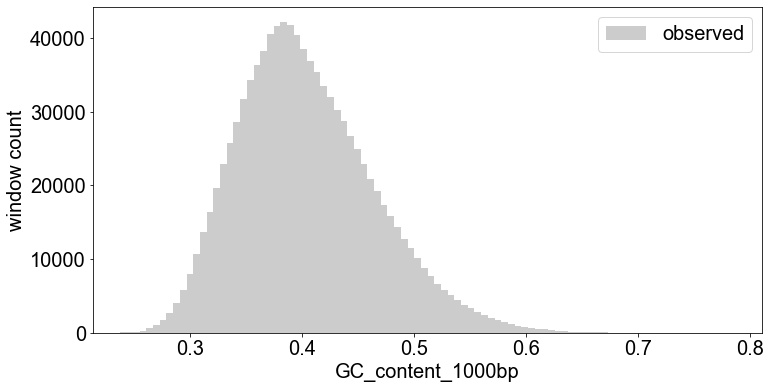

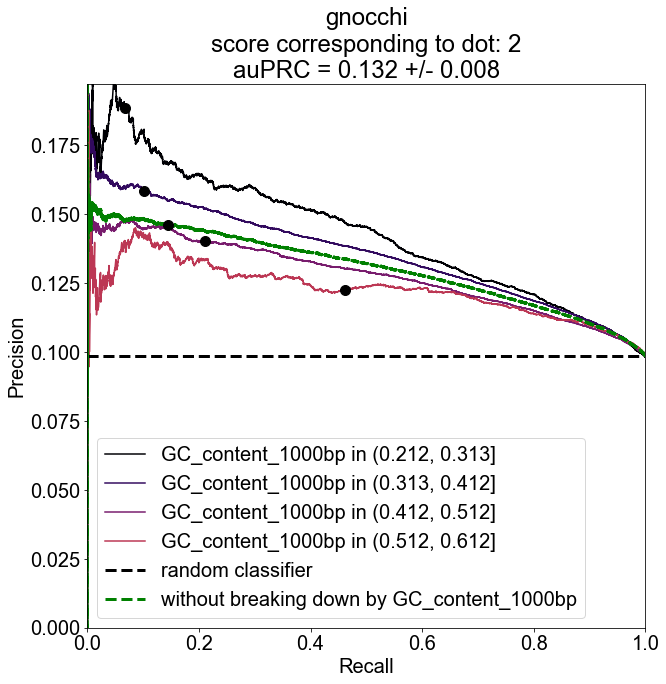

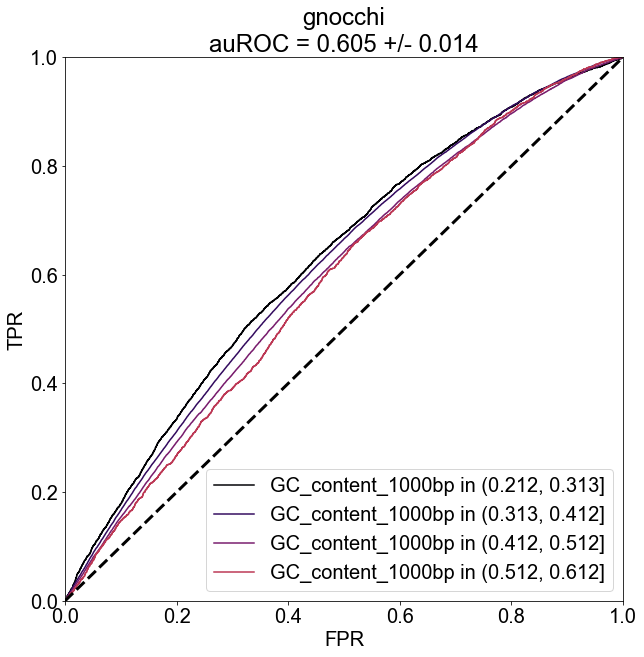

conditioning on B_M1star.EUR in [0.23484766553012815, 0.39348785122344543]
conditioning on B in [0.7824028390130828, 0.8536915045402709]
(0.234, 0.322]: 3576
(0.322, 0.409]: 22119
(0.322, 0.409]: r = 0.1073737510737375; precision = 0.17350157728706625; precision/r = 1.6158658475842604; FDR = 0.8264984227129337; FDR/(1-r) = 0.9259176768632182
(0.409, 0.496]: 9991
(0.409, 0.496]: r = 0.1072965669102192; precision = 0.14835164835164835; precision/r = 1.3826318271280957; FDR = 0.8516483516483516; FDR/(1-r) = 0.9540103914473238
(0.496, 0.582]: 1192
(0.582, 0.669]: 64


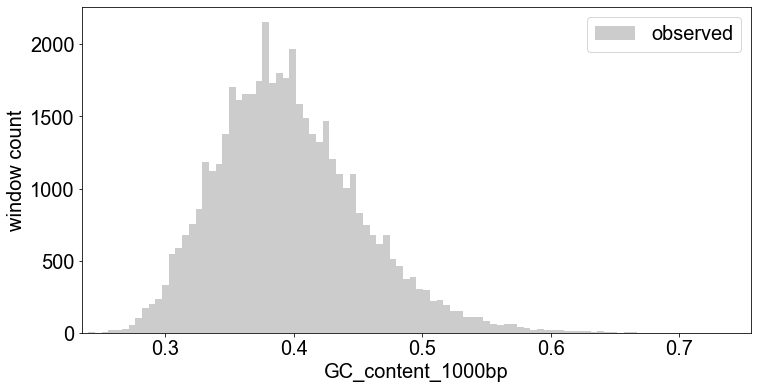

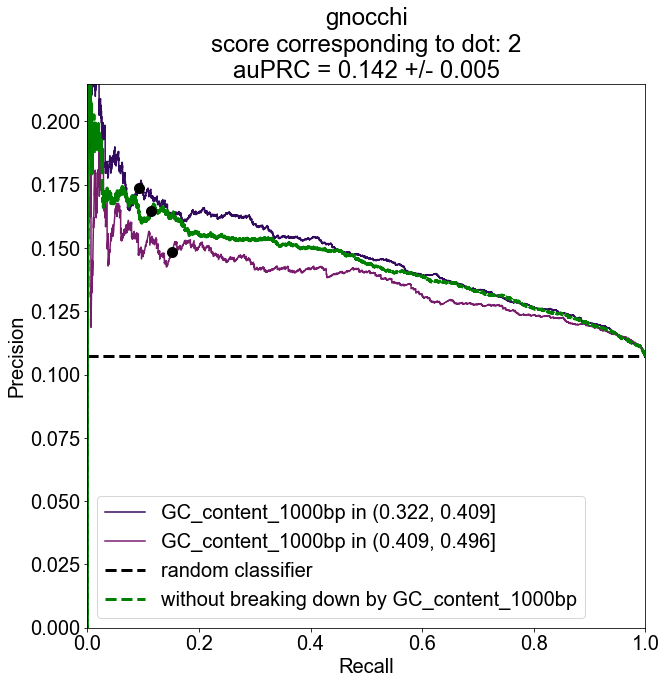

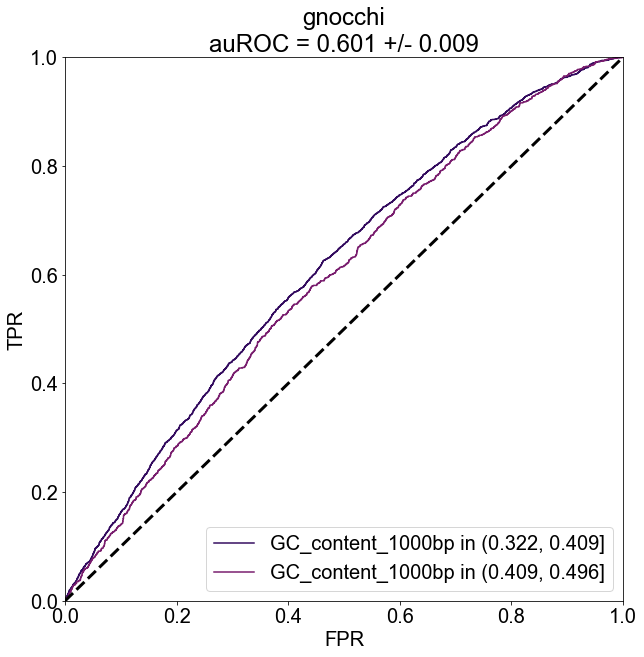

(0.0942, 0.219]: 3735
(0.219, 0.344]: 7435022
(0.219, 0.344]: r = 0.01633189518470826; precision = 0.025189142709269367; precision/r = 1.5423282126408848; FDR = 0.9748108572907306; FDR/(1-r) = 0.9909956951117934
(0.344, 0.469]: 19971207
(0.344, 0.469]: r = 0.016331962309538928; precision = 0.023881537918836508; precision/r = 1.4622577168750956; FDR = 0.9761184620811635; FDR/(1-r) = 0.9923250778514435
(0.469, 0.593]: 3373961
(0.469, 0.593]: r = 0.01633184260280424; precision = 0.024496386586062267; precision/r = 1.4999156667023072; FDR = 0.9755036134139378; FDR/(1-r) = 0.991699900091448
(0.593, 0.718]: 142473
(0.593, 0.718]: r = 0.016325900346030476; precision = 0.03999641287776881; precision/r = 2.4498748632563867; FDR = 0.9600035871222312; FDR/(1-r) = 0.975936631309023
(0.718, 0.842]: 312


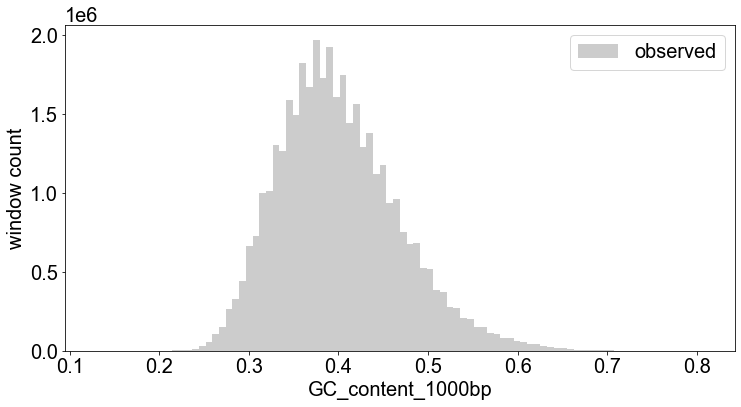

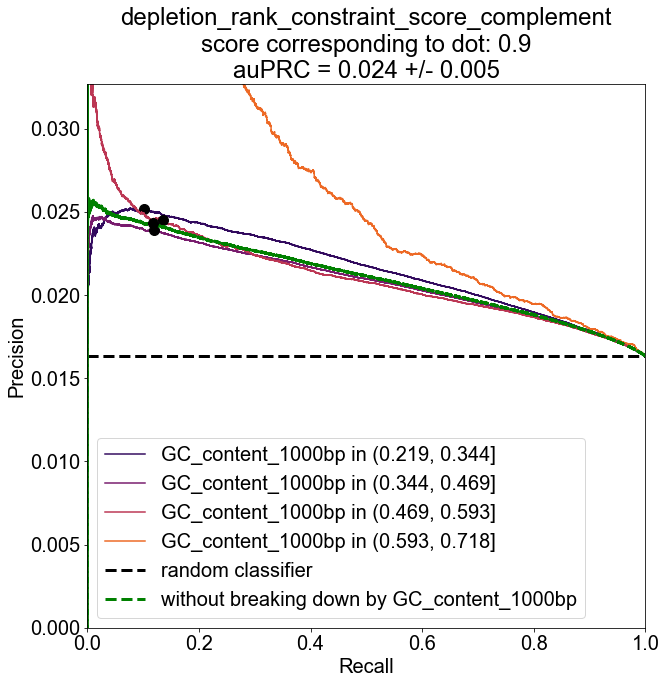

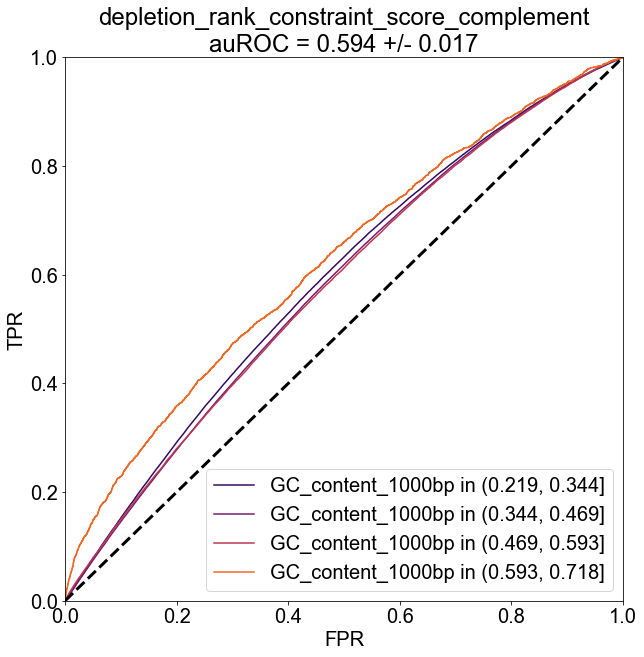

conditioning on B_M1star.EUR in [0.23286499008030304, 0.393335989681713]
conditioning on B in [0.7765943180648358, 0.8500509136402088]
(0.148, 0.261]: 6277
(0.148, 0.261]: r = 0.011151824119802454; precision = 0.014285714285714285; precision/r = 1.2810204081632652; FDR = 0.9857142857142858; FDR/(1-r) = 0.9968307671062625
(0.261, 0.374]: 678151
(0.261, 0.374]: r = 0.011150908868378872; precision = 0.015223260643821391; precision/r = 1.3652035743015234; FDR = 0.9847767393561786; FDR/(1-r) = 0.9958817257234042
(0.374, 0.486]: 700166
(0.374, 0.486]: r = 0.011151641182233928; precision = 0.01633230452674897; precision/r = 1.4645651039031402; FDR = 0.9836676954732511; FDR/(1-r) = 0.9947609122285354
(0.486, 0.598]: 70210
(0.486, 0.598]: r = 0.011138014527845037; precision = 0.021732332707942465; precision/r = 1.9511855235609212; FDR = 0.9782676672920575; FDR/(1-r) = 0.9892863530646908
(0.598, 0.711]: 3738
(0.711, 0.823]: 10


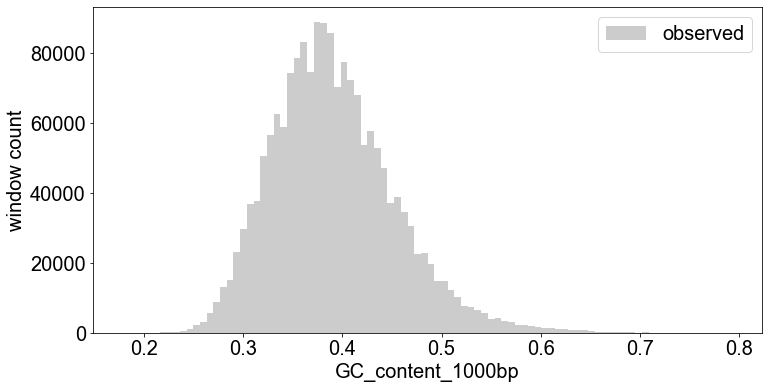

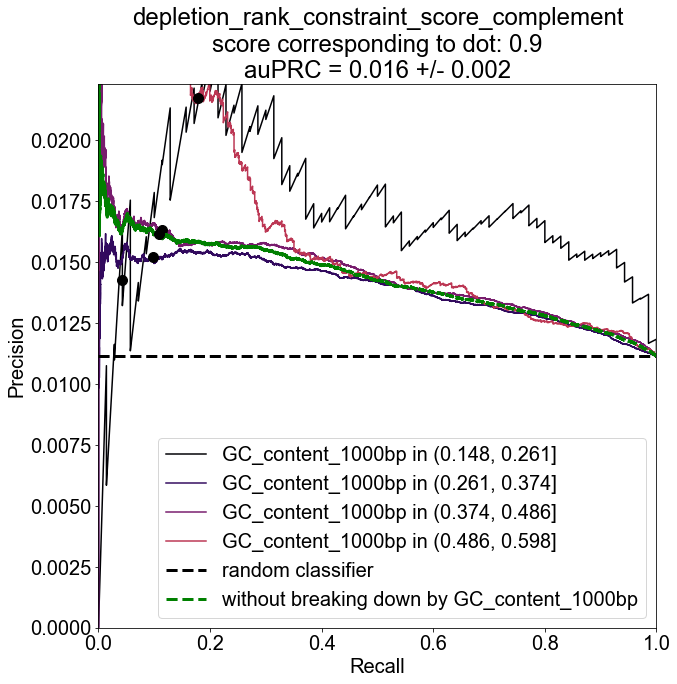

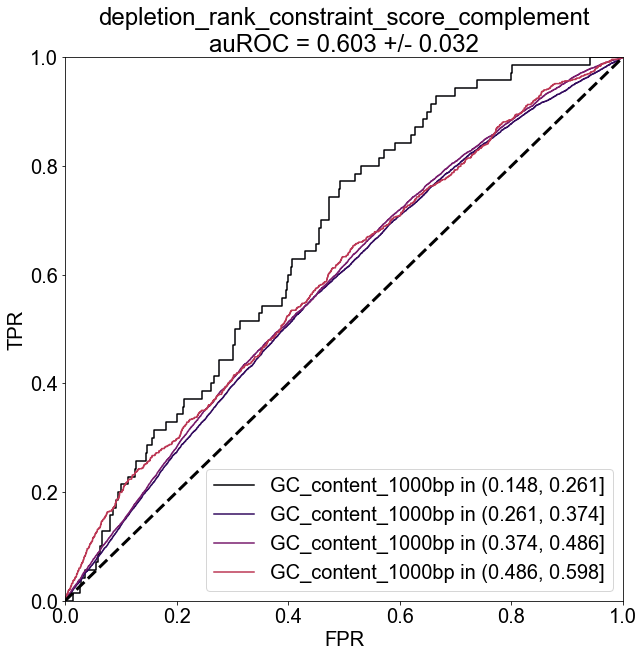

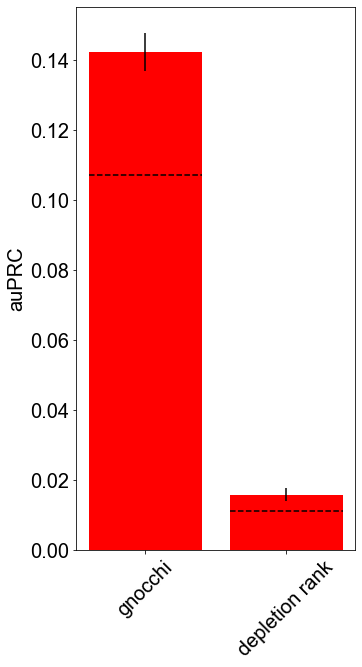

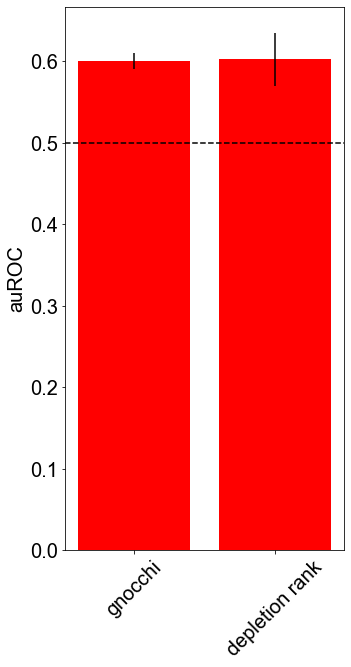

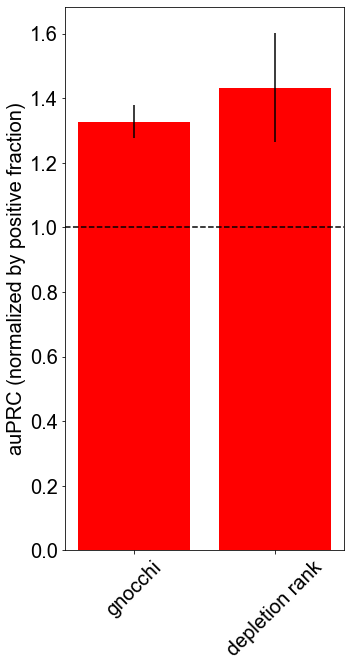

In [9]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

def plot_random_classifier(df, target, type_, color, ax):
    r = compute_positive_fraction(df, target)
    if type_ == 'precision': 
        ys = [r, r] 
    elif type_ == 'FDR':
        ys = [1-r, 1-r]
    else: 
        raise ValueError(f'invalid type: {type_}')
    ax.plot([0, 1], ys, linestyle='--', linewidth=3, color=color, label='random classifier') 
  
def plot_pr_curve_single_bin(ax, type_, precision, recall, pr_thresholds, df_bin, target, feature, feature_bin, constraint_score_to_plot, color):
    FDR = 1 - precision

    if type_ == 'precision': 
        ys = precision
    elif type_ == 'FDR':
        ys = FDR
    else:
        raise ValueError(f'invalid type: {type_}')
    
    ax.plot(recall, ys, color=color, linestyle='-', label=f'{feature} in {feature_bin}') 
    closest_score_idx = np.argmin(np.abs(pr_thresholds - constraint_score_to_plot))
    # Plot the point on the PR curve corresponding to a threshold closest to given constraint score
    ax.plot(recall[closest_score_idx], ys[closest_score_idx], 'ko', markersize=10, label=None) 
    
    precision = precision[closest_score_idx]
    FDR = 1 - precision
    r = compute_positive_fraction(df_bin, target)
    print(f'{feature_bin}: r = {r}; precision = {precision}; precision/r = {precision/r}; FDR = {FDR}; FDR/(1-r) = {FDR/(1-r)}')

def plot_roc_curve_single_bin(ax, fpr, tpr, color, feature, feature_bin):
    ax.plot(fpr, tpr, color=color, linestyle='-', label=f'{feature} in {feature_bin}')

def finish_pr_curve(ax, type_, constraint_score, constraint_score_to_plot, summary_statistics): 
    ax.grid(False)
    ax.legend()
    ax.set_xlabel('Recall')
    if type_ == 'precision':
        ylabel = 'Precision'
    elif type_ == 'FDR':
        ylabel = 'FDR'
    else:
        raise ValueError(f'invalid type: {type_}')
    ax.set_ylabel(ylabel) 
    ax.set_xlim(0, 1)
    r = summary_statistics['r']
    if type_ == 'precision':
        ylim = (0, 2*r)
    elif type_ == 'FDR':
        ylim = (0, 2*(1-r))
    else: 
        raise ValueError(f'invalid type: {type_}')
    ax.set_ylim(ylim) # type: ignore
    ax.set_title(
        f'{constraint_score}\n'
        f'score corresponding to dot: {constraint_score_to_plot}\n'
        f'auPRC = {summary_statistics["mean_auPRC"]:.3f} +/- {summary_statistics["std_auPRC"]:.3f}'
    )

def finish_roc_curve(ax, constraint_score, summary_statistics):
    ax.grid(False)
    ax.legend()
    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR') 
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(
        f'{constraint_score}\n'
        f'auROC = {summary_statistics["mean_auROC"]:.3f} +/- {summary_statistics["std_auROC"]:.3f}'
    )

def plot_curves_all_bins(df, type_, feature, number_bins, constraint_score, target, constraint_score_to_plot): 
    plot_feature_distribution(df, feature, xlabel=feature, density=False)
    
    df = preprocess(df, feature, target, number_bins)

    _, ax_pr = plt.subplots(figsize=(10, 10))
    _, ax_roc = plt.subplots(figsize=(10, 10))

    cmap = cm.get_cmap('inferno')

    summary_statistics = {}

    for i, feature_bin in enumerate(sorted(df[f'{feature}_bin'].unique())): 
        df_bin = df[df[f'{feature}_bin'] == feature_bin]
        print(f'{feature_bin}: {len(df_bin)}')
        if len(df_bin) < 4000: continue
        color = cmap(i / number_bins)
        targets, scores = df_bin[target], df_bin[constraint_score]        
        precision, recall, pr_thresholds = precision_recall_curve(targets, scores)
        fpr, tpr, _ = roc_curve(targets, scores)
        summary_statistics[f'auPRC_{feature_bin}'] = auc(recall, precision)
        summary_statistics[f'auPRCnorm_{feature_bin}'] = auc(recall, precision)/compute_positive_fraction(df_bin, target)
        summary_statistics[f'auROC_{feature_bin}'] = auc(fpr, tpr)
        plot_pr_curve_single_bin(ax_pr, type_, precision, recall, pr_thresholds, df_bin, target, feature, feature_bin, constraint_score_to_plot, color)
        plot_roc_curve_single_bin(ax_roc, fpr, tpr, color, feature, feature_bin)

    plot_random_classifier(
        df, 
        target, 
        type_=type_,
        color='black', 
        ax=ax_pr,
    )
    ax_roc.plot([0, 1], [0, 1], linewidth=3, linestyle='--', color='black')

    # plot PR curve of classifier without breaking down by feature
    targets, scores = df[target], df[constraint_score]
    precision, recall, thresholds = precision_recall_curve(targets, scores)
    FDR = 1 - precision

    # Compute and return auPRC
    summary_statistics['auPRC'] = auc(recall, precision)

    summary_statistics['r'] = compute_positive_fraction(df, target)

    if type_ == 'precision': 
        ys = precision
    elif type_ == 'FDR':
        ys = FDR
    else:
        raise ValueError(f'invalid type: {type_}')
    ax_pr.plot(recall, ys, color='green', linewidth=3, linestyle='--', label=f'without breaking down by {feature}') 

    closest_score_idx = np.argmin(np.abs(thresholds - constraint_score_to_plot))
    # Plot the point on the PR curve corresponding to a threshold closest to given constraint score
    ax_pr.plot(recall[closest_score_idx], ys[closest_score_idx], 'ko', markersize=10, label=None) 

    summary_statistics = compute_mean_and_std_area_under_curve(summary_statistics, 'PRC')
    summary_statistics = compute_mean_and_std_area_under_curve(summary_statistics, 'PRCnorm')
    summary_statistics = compute_mean_and_std_area_under_curve(summary_statistics, 'ROC')

    finish_pr_curve(ax_pr, type_, constraint_score, constraint_score_to_plot, summary_statistics)
    finish_roc_curve(ax_roc, constraint_score, summary_statistics)

    plt.show()

    return summary_statistics

def compute_mean_and_std_area_under_curve(summary_statistics, curve_type): 
    areas = [v for k, v in summary_statistics.items() if k.startswith(f'au{curve_type}_')]
    summary_statistics[f'mean_au{curve_type}'] = np.mean(areas) 
    summary_statistics[f'std_au{curve_type}'] = np.std(areas) 
    return summary_statistics

def check_r_value(list_of_summary_statistics):
    r_value = list_of_summary_statistics[0]['r']  # get the 'r' value of the first item
    for summary_statistics in list_of_summary_statistics:
        if summary_statistics['r'] != r_value:
            return False
    return True

def plot_auROC(list_of_summary_statistics): 
    fig, ax = plt.subplots(figsize=(5, 10))
    bars = ax.bar(
        [summary_statistics['name'] for summary_statistics in list_of_summary_statistics], 
        [summary_statistics['mean_auROC'] for summary_statistics in list_of_summary_statistics], 
        yerr=[summary_statistics['std_auROC'] for summary_statistics in list_of_summary_statistics], 
        color=[summary_statistics['auROC_color'] for summary_statistics in list_of_summary_statistics]
    )
    plt.axhline(y=0.5, color='black', linestyle='--')
    ax.set_ylabel('auROC')
    ax.xaxis.set_tick_params(rotation=45)
    plt.show() 

def plot_auPRC(list_of_summary_statistics): 
    rs = [summary_statistics['r'] for summary_statistics in list_of_summary_statistics]

    fig, ax = plt.subplots(figsize=(5, 10))
    bars = ax.bar(
        [summary_statistics['name'] for summary_statistics in list_of_summary_statistics], 
        [summary_statistics['mean_auPRC'] for summary_statistics in list_of_summary_statistics], 
        yerr=[summary_statistics['std_auPRC'] for summary_statistics in list_of_summary_statistics], 
        color=[summary_statistics['auPRC_color'] for summary_statistics in list_of_summary_statistics]
    )
    # Plot horizontal lines corresponding to each bar
    for bar, r in zip(bars, rs):
        bar_x = bar.get_x()
        bar_width = bar.get_width()
        plt.plot([bar_x, bar_x + bar_width], [r, r], color='black', linestyle='--')
    ax.set_ylabel('auPRC')
    ax.xaxis.set_tick_params(rotation=45)
    plt.show()

def plot_auPRCnorm(list_of_summary_statistics): 
    # https://genomebiology.biomedcentral.com/articles/10.1186/s13059-021-02568-9
    _, ax = plt.subplots(figsize=(5, 10))
    ax.bar(
        [summary_statistics['name'] for summary_statistics in list_of_summary_statistics], 
        [summary_statistics['mean_auPRCnorm'] for summary_statistics in list_of_summary_statistics], 
        yerr=[summary_statistics['std_auPRCnorm'] for summary_statistics in list_of_summary_statistics], 
        color=[summary_statistics['auPRCnorm_color'] for summary_statistics in list_of_summary_statistics]
    )
    plt.axhline(y=1, color='black', linestyle='--')
    ax.set_ylabel('auPRC (normalized by positive fraction)')
    ax.xaxis.set_tick_params(rotation=45)
    plt.show()

def plot_curves_with_and_without_slicing(
    df, 
    gc_window_size, 
    feature, 
    number_bins, 
    constraint_score, 
    constraint_score_alias,
    constraint_score_to_plot,
    auPRC_color,
    auPRCnorm_color,
    auROC_color,
    type_='precision',
    target='window overlaps enhancer', 
): 
    assert feature in [f for f, _, _, _ in get_features_and_lims_and_labels(df, gc_window_size)]

    plot_curves_all_bins(df, type_, feature, number_bins, constraint_score, target, constraint_score_to_plot)

    conditional_features_and_center_lims = [
        (f, cl) for f, cl, _, _ in get_features_and_lims_and_labels(df, gc_window_size) if f != feature
    ]
    df_sliced = slice_feature_space(df, conditional_features_and_center_lims)
    summary_statistics_sliced = plot_curves_all_bins(df_sliced, type_, feature, number_bins, constraint_score, target, constraint_score_to_plot)
    summary_statistics_sliced['name'] = constraint_score_alias
    summary_statistics_sliced['auPRC_color'] = auPRC_color  
    summary_statistics_sliced['auPRCnorm_color'] = auPRCnorm_color
    summary_statistics_sliced['auROC_color'] = auROC_color  

    return summary_statistics_sliced

def plot_area_under_curve_wrapper(gc_window_size, feature, number_bins): 
    list_of_summary_statistics = []

    list_of_summary_statistics.append(plot_curves_with_and_without_slicing(
        CHEN_WINDOWS, 
        gc_window_size, 
        feature, 
        number_bins, 
        constraint_score='gnocchi', 
        constraint_score_alias='gnocchi',
        constraint_score_to_plot=2, 
        auPRC_color='red',
        auPRCnorm_color='red',
        auROC_color='red'
    ))

    list_of_summary_statistics.append(plot_curves_with_and_without_slicing(
        HALLDORSSON_WINDOWS, 
        gc_window_size, 
        feature, 
        number_bins, 
        constraint_score='depletion_rank_constraint_score_complement',
        constraint_score_alias='depletion rank',
        constraint_score_to_plot=0.9, 
        auPRC_color='red',
        auPRCnorm_color='red',
        auROC_color='red'
    ))

    plot_auPRC(list_of_summary_statistics)
    plot_auROC(list_of_summary_statistics)
    plot_auPRCnorm(list_of_summary_statistics)

plot_area_under_curve_wrapper(
    gc_window_size=1000,
    feature='GC_content_1000bp',
    number_bins=6,
)

(0.536, 0.613]: 80750
(0.536, 0.613]: r = 0.28175851393188855; precision = 0.4011047582130051; precision/r = 1.423576354856723; FDR = 0.5988952417869948; FDR/(1-r) = 0.8338354904358742
(0.613, 0.689]: 73197
(0.613, 0.689]: r = 0.2817601814282006; precision = 0.41921624788439005; precision/r = 1.4878477354729296; FDR = 0.58078375211561; FDR/(1-r) = 0.8086209328668005
(0.689, 0.766]: 117718
(0.689, 0.766]: r = 0.28175809986578093; precision = 0.44600548674037743; precision/r = 1.5829375870750046; FDR = 0.5539945132596226; FDR/(1-r) = 0.7713202378698552
(0.766, 0.843]: 197411
(0.766, 0.843]: r = 0.28176241445512157; precision = 0.4783932162852639; precision/r = 1.6978602955628108; FDR = 0.5216067837147361; FDR/(1-r) = 0.7262315342617837
(0.843, 0.919]: 294522
(0.843, 0.919]: r = 0.28176163410543187; precision = 0.46750333257469845; precision/r = 1.6592157199079993; FDR = 0.5324966674253016; FDR/(1-r) = 0.7413926806347574
(0.919, 0.996]: 201638
(0.919, 0.996]: r = 0.28176236622065287; prec

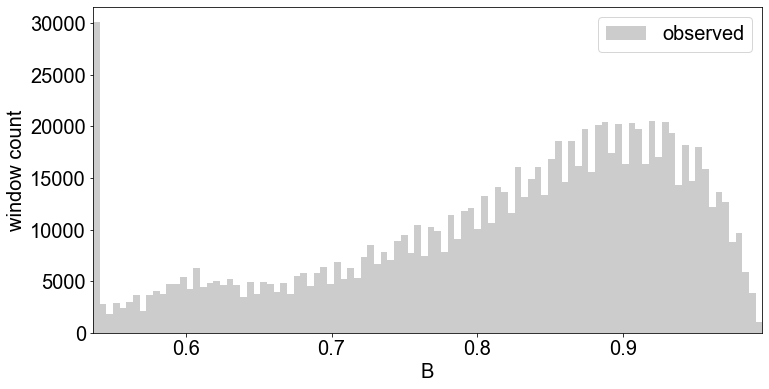

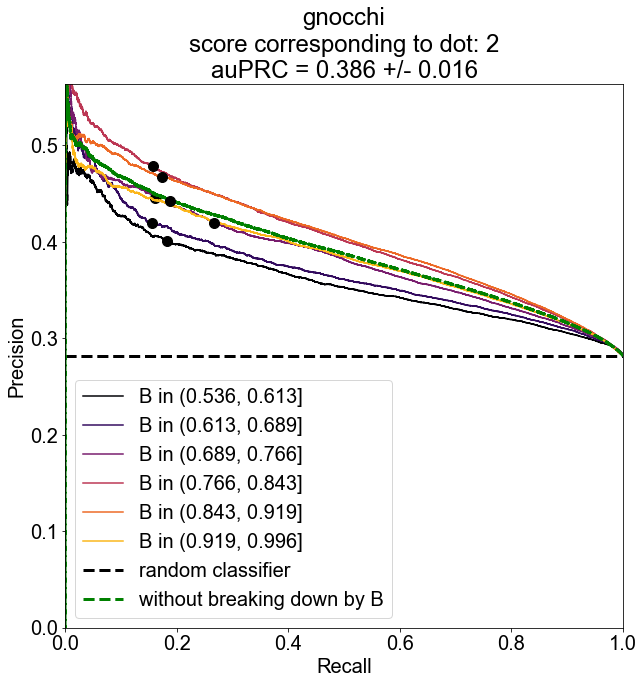

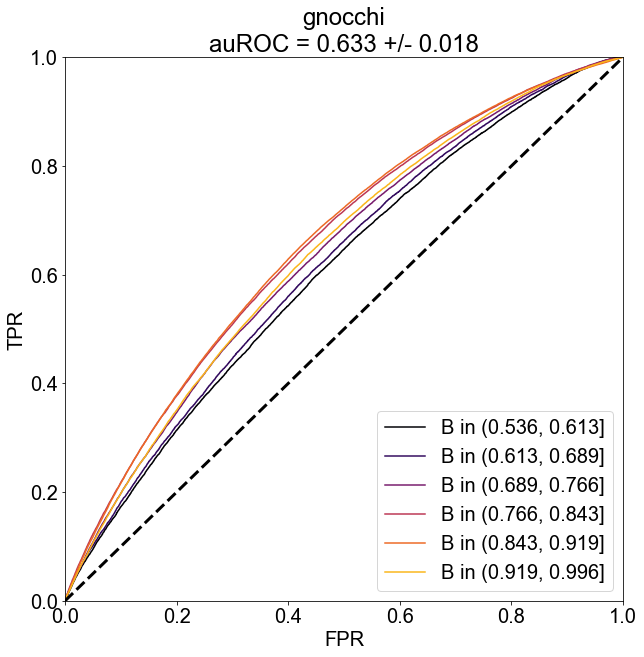

conditioning on GC_content_1000bp in [0.38558346066943017, 0.42231631769777855]
conditioning on B_M1star.EUR in [0.23484766553012815, 0.39348785122344543]
(0.536, 0.612]: 4597
(0.536, 0.612]: r = 0.2932347182945399; precision = 0.34292035398230086; precision/r = 1.1694398125049237; FDR = 0.6570796460176991; FDR/(1-r) = 0.9296999485205794
(0.612, 0.689]: 4183
(0.612, 0.689]: r = 0.2930910829548171; precision = 0.4129353233830846; precision/r = 1.4088976000908995; FDR = 0.5870646766169154; FDR/(1-r) = 0.830467210784091
(0.689, 0.766]: 6790
(0.689, 0.766]: r = 0.2932253313696613; precision = 0.36904761904761907; precision/r = 1.2585802779172945; FDR = 0.6309523809523809; FDR/(1-r) = 0.892720705702577
(0.766, 0.842]: 11176
(0.766, 0.842]: r = 0.29321760916249107; precision = 0.382259767687434; precision/r = 1.3036726163182064; FDR = 0.617740232312566; FDR/(1-r) = 0.8740175764432508
(0.842, 0.919]: 16386
(0.842, 0.919]: r = 0.2932381301110704; precision = 0.41555380989787905; precision/r = 

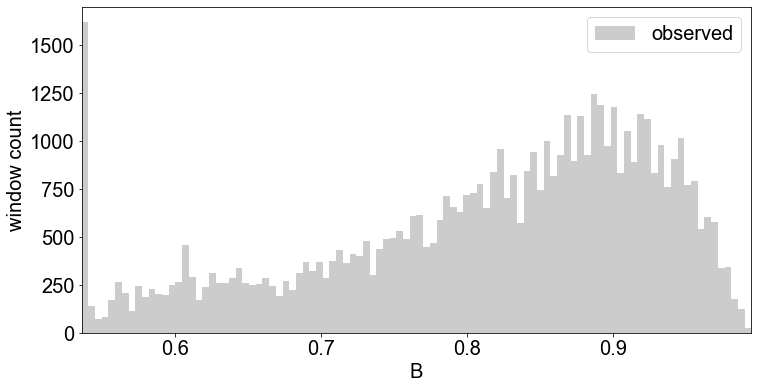

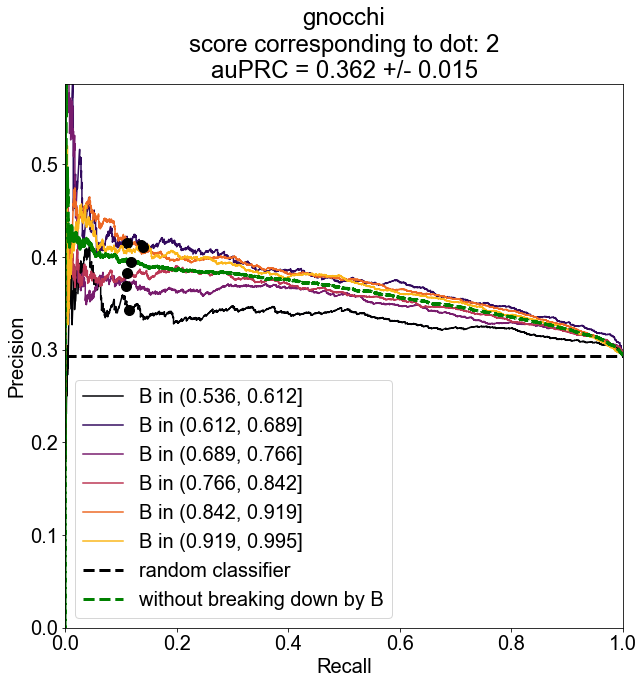

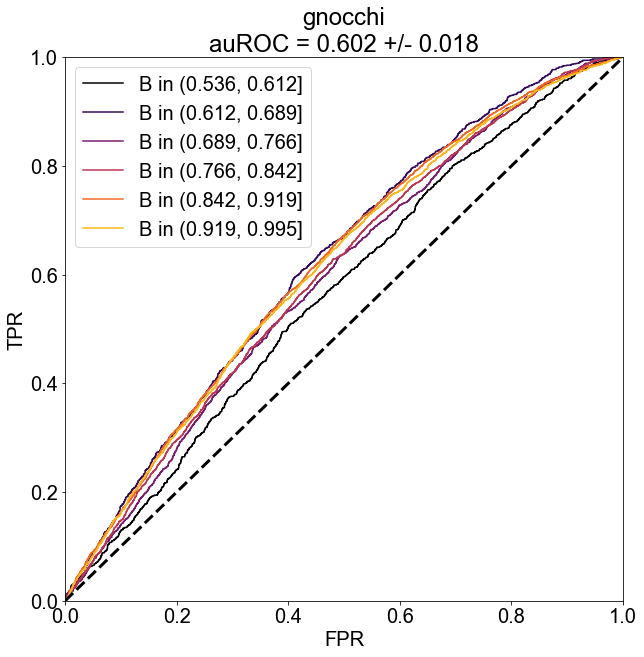

(0.536, 0.613]: 3595217
(0.536, 0.613]: r = 0.1911650951806247; precision = 0.254178310842404; precision/r = 1.3296272031368515; FDR = 0.745821689157596; FDR/(1-r) = 0.9220938472285007
(0.613, 0.69]: 3065024
(0.613, 0.69]: r = 0.19116522415485165; precision = 0.259100474722263; precision/r = 1.3553745241466146; FDR = 0.7408995252777371; FDR/(1-r) = 0.916008494446315
(0.69, 0.766]: 4626632
(0.69, 0.766]: r = 0.19116519316859434; precision = 0.27410416919330916; precision/r = 1.4338602370546003; FDR = 0.7258958308066908; FDR/(1-r) = 0.8974586957383467
(0.766, 0.843]: 7556193
(0.766, 0.843]: r = 0.19116531300881276; precision = 0.28570726183263495; precision/r = 1.4945559805583757; FDR = 0.714292738167365; FDR/(1-r) = 0.8831133847937307
(0.843, 0.92]: 11077368
(0.843, 0.92]: r = 0.19116526597292788; precision = 0.28386049156651066; precision/r = 1.4848957530114804; FDR = 0.7161395084334894; FDR/(1-r) = 0.885396581410313
(0.92, 0.997]: 7691226
(0.92, 0.997]: r = 0.1911652316548753; precisi

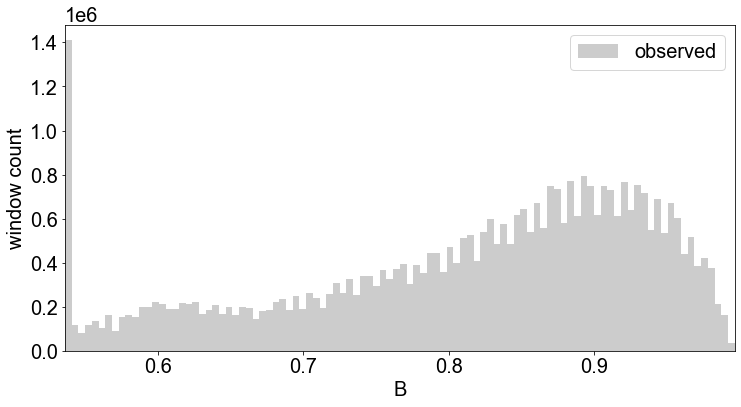

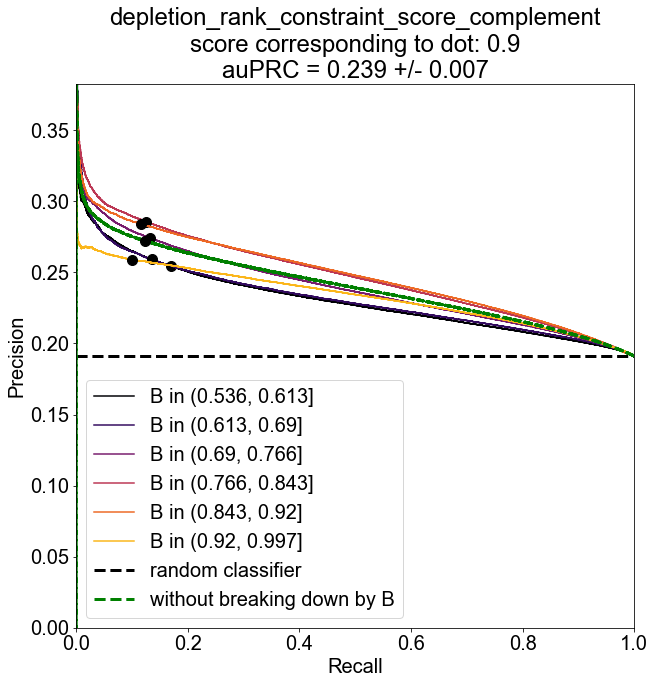

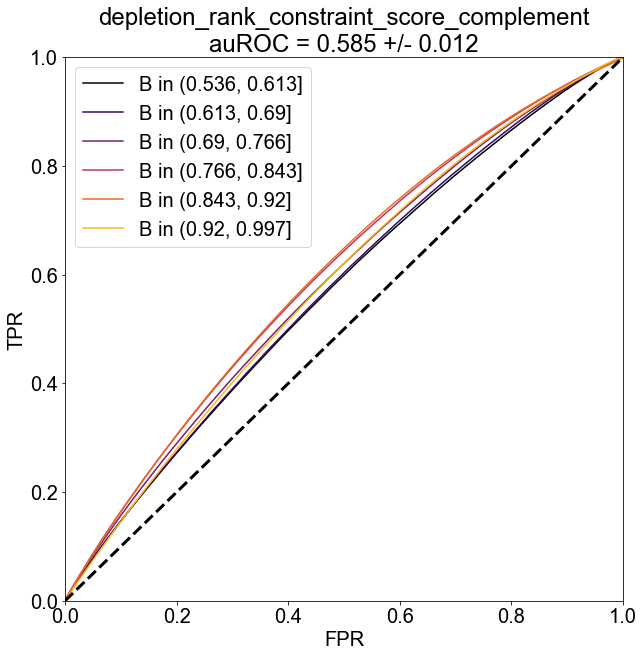

conditioning on GC_content_1000bp in [0.3802793985505721, 0.42073419235976744]
conditioning on B_M1star.EUR in [0.23286499008030304, 0.393335989681713]
(0.536, 0.613]: 225907
(0.536, 0.613]: r = 0.19650121510178967; precision = 0.23752977694362232; precision/r = 1.2087954612422087; FDR = 0.7624702230563777; FDR/(1-r) = 0.9489376180612018
(0.613, 0.689]: 178773
(0.613, 0.689]: r = 0.1965005901338569; precision = 0.27422585999656574; precision/r = 1.3955472592207592; FDR = 0.7257741400034343; FDR/(1-r) = 0.9032665501575698
(0.689, 0.766]: 275832
(0.689, 0.766]: r = 0.19650366889991008; precision = 0.26103113612584333; precision/r = 1.328377925904277; FDR = 0.7389688638741567; FDR/(1-r) = 0.9196916467090935
(0.766, 0.843]: 438828
(0.766, 0.843]: r = 0.1965029578787133; precision = 0.2656152616318456; precision/r = 1.351711264294506; FDR = 0.7343847383681543; FDR/(1-r) = 0.9139856152168635
(0.843, 0.919]: 639389
(0.843, 0.919]: r = 0.19650322417182653; precision = 0.2750569923748133; preci

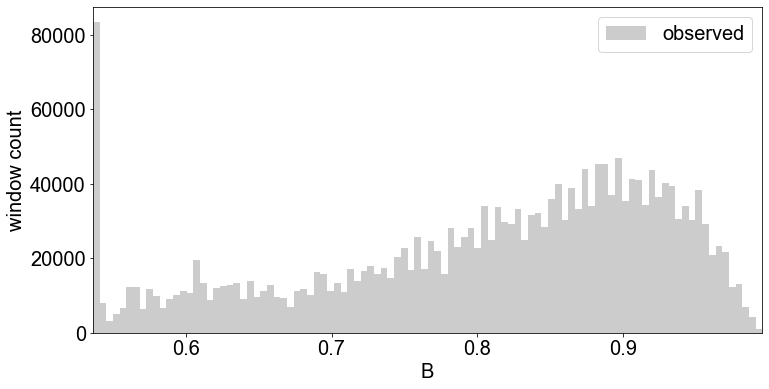

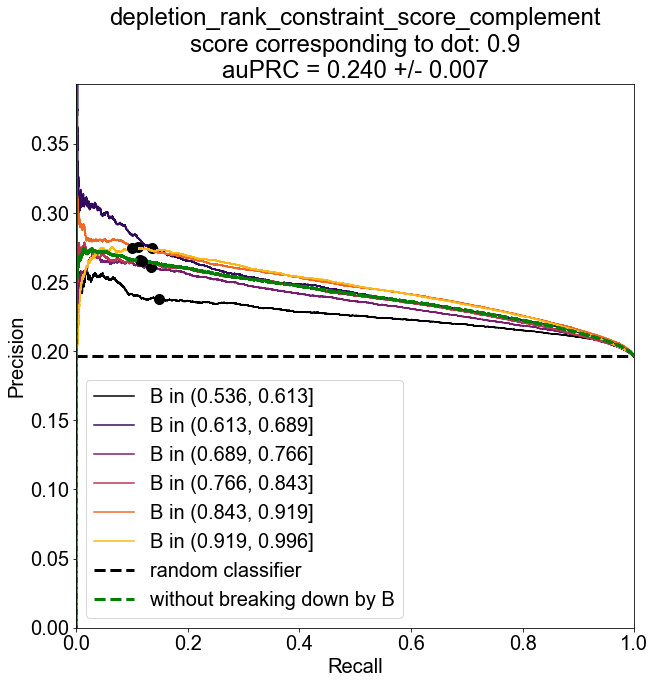

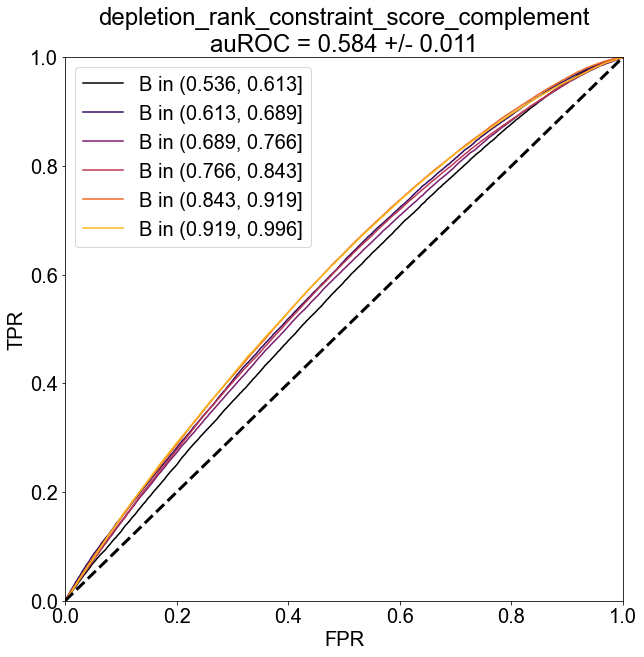

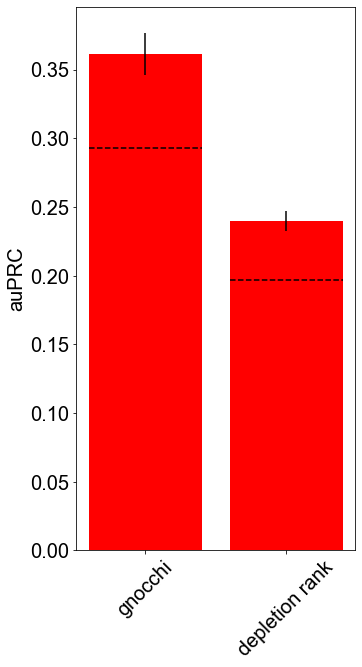

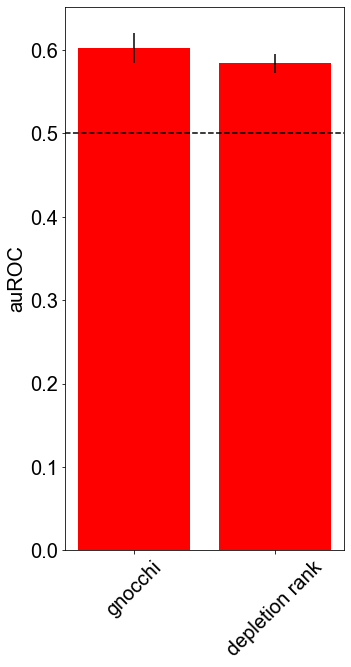

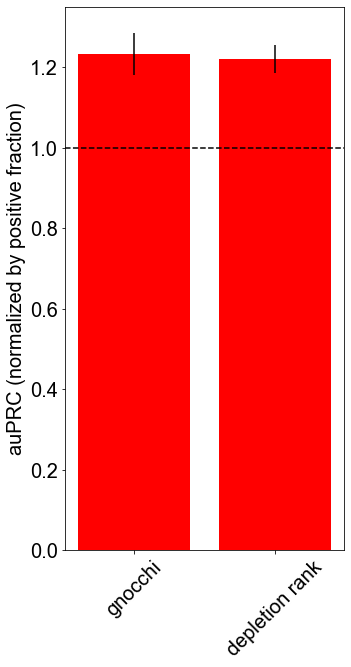

In [10]:
plot_area_under_curve_wrapper(
    gc_window_size=1000,
    feature='B',
    number_bins=6,
)

(-0.663, -0.324]: 3604
(-0.324, 0.0126]: 115663
(-0.324, 0.0126]: r = 0.26976647674710147; precision = 0.4936752529898804; precision/r = 1.8300096399771983; FDR = 0.5063247470101195; FDR/(1-r) = 0.6933737371500629
(0.0126, 0.349]: 440261
(0.0126, 0.349]: r = 0.2697649803184929; precision = 0.4485094215805756; precision/r = 1.6625931989061422; FDR = 0.5514905784194244; FDR/(1-r) = 0.7552234055550469
(0.349, 0.685]: 319311
(0.349, 0.685]: r = 0.26976521322472446; precision = 0.40034562211981567; precision/r = 1.4840520663659953; FDR = 0.5996543778801844; FDR/(1-r) = 0.8211802405747669
(0.685, 1.022]: 62945
(0.685, 1.022]: r = 0.26975931368655176; precision = 0.38904109589041097; precision/r = 1.442178550107298; FDR = 0.6109589041095891; FDR/(1-r) = 0.8366541546650296
(1.022, 1.358]: 6933
(1.022, 1.358]: r = 0.2697245059858647; precision = 0.37326732673267327; precision/r = 1.383883623656483; FDR = 0.6267326732673267; FDR/(1-r) = 0.8582140279996793
(1.358, 1.695]: 661


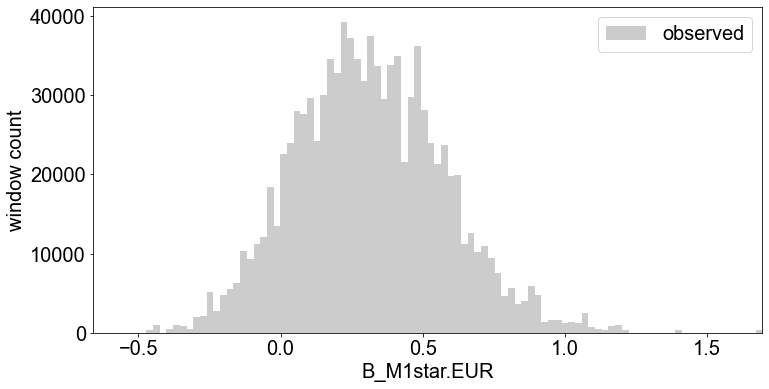

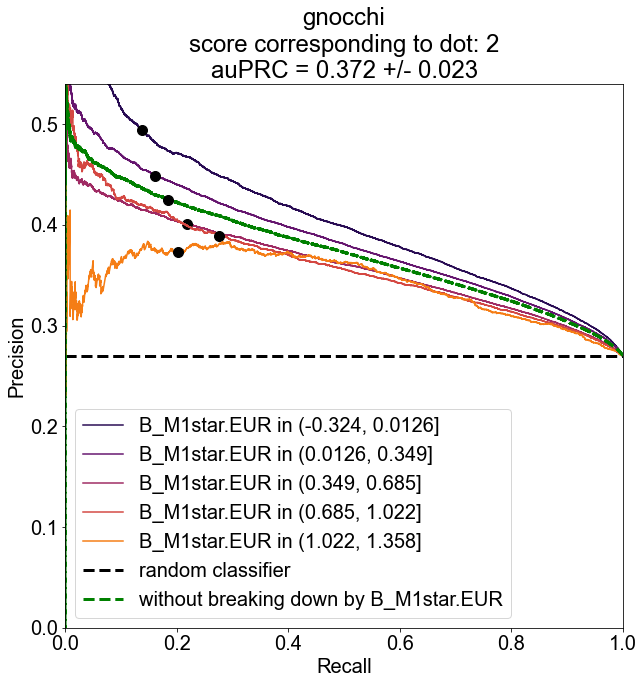

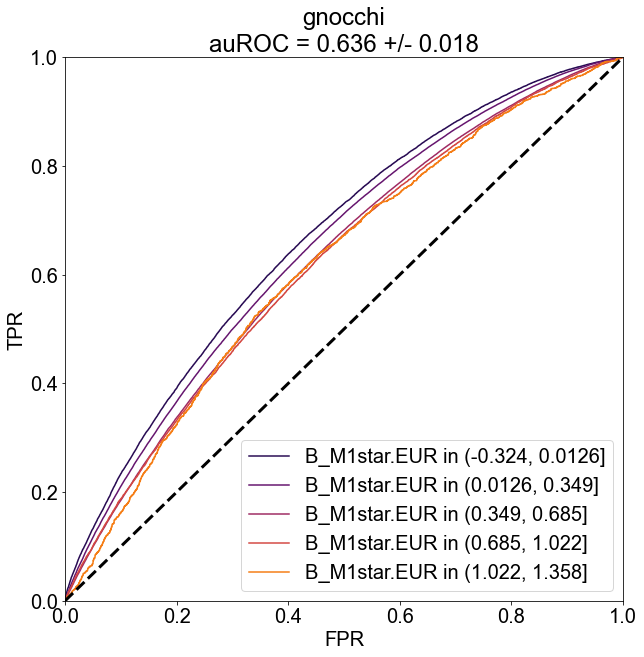

conditioning on GC_content_1000bp in [0.38558346066943017, 0.42231631769777855]
conditioning on B in [0.7824028390130828, 0.8536915045402709]
(-0.469, -0.158]: 1311
(-0.158, 0.151]: 12898
(-0.158, 0.151]: r = 0.27763994417739185; precision = 0.39620081411126185; precision/r = 1.4270310249670637; FDR = 0.6037991858887382; FDR/(1-r) = 0.8358701190933717
(0.151, 0.459]: 20578
(0.151, 0.459]: r = 0.2776265915054913; precision = 0.3780281690140845; precision/r = 1.3616425104099126; FDR = 0.6219718309859155; FDR/(1-r) = 0.8610115262716561
(0.459, 0.768]: 10213
(0.459, 0.768]: r = 0.27758738862234406; precision = 0.3660531697341513; precision/r = 1.3186952460299426; FDR = 0.6339468302658486; FDR/(1-r) = 0.8775412005292915
(0.768, 1.077]: 1565
(1.077, 1.386]: 228
(1.386, 1.695]: 6


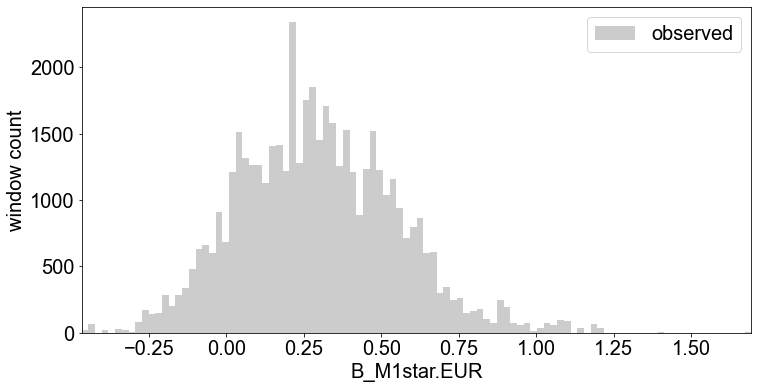

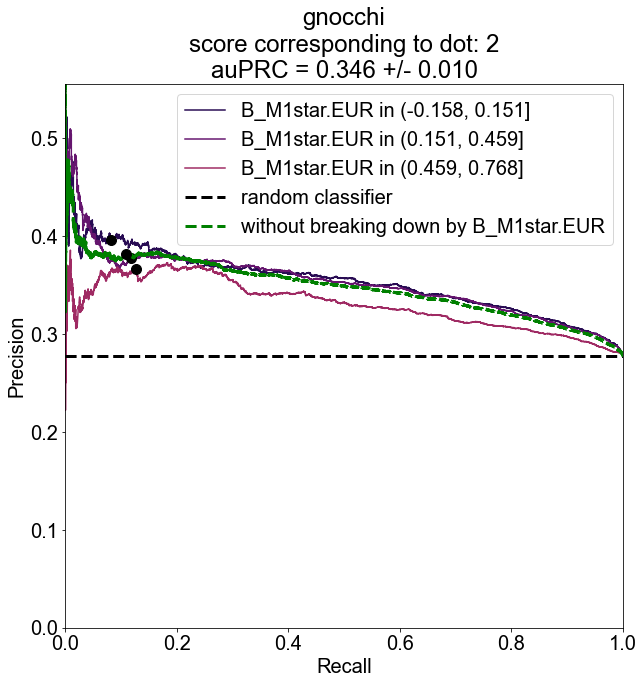

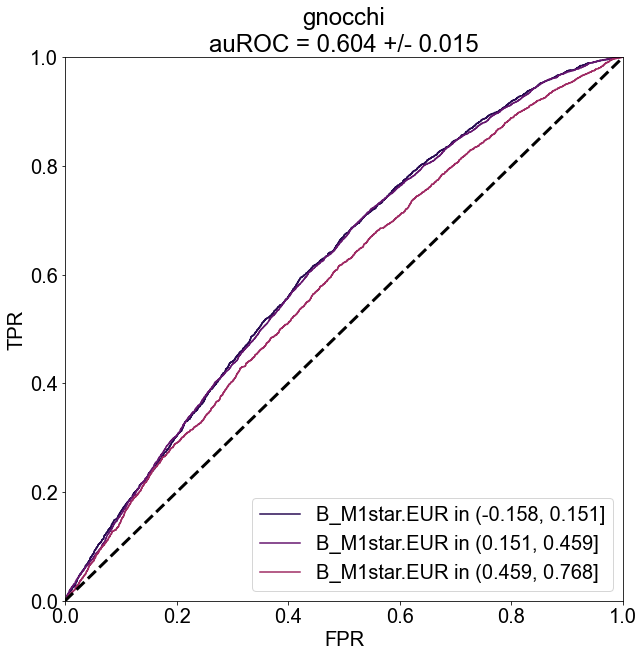

(-0.734, -0.385]: 102358
(-0.734, -0.385]: r = 0.15194708767267825; precision = 0.27236458493171706; precision/r = 1.792496250526631; FDR = 0.7276354150682829; FDR/(1-r) = 0.8580070942406464
(-0.385, -0.0383]: 3086091
(-0.385, -0.0383]: r = 0.15195533767474775; precision = 0.2600472914141328; precision/r = 1.7113402884915438; FDR = 0.7399527085858673; FDR/(1-r) = 0.8725397864742078
(-0.0383, 0.308]: 15630981
(-0.0383, 0.308]: r = 0.1519553379279266; precision = 0.23092824104771204; precision/r = 1.5197112796211398; FDR = 0.769071758952288; FDR/(1-r) = 0.906876481096141
(0.308, 0.655]: 13848622
(0.308, 0.655]: r = 0.15195533533950165; precision = 0.20939862403632645; precision/r = 1.3780274550313345; FDR = 0.7906013759636735; FDR/(1-r) = 0.9322638404666795
(0.655, 1.001]: 2860554
(0.655, 1.001]: r = 0.15195518070975064; precision = 0.19532465438716698; precision/r = 1.2854096416775438; FDR = 0.804675345612833; FDR/(1-r) = 0.9488594556668439
(1.001, 1.348]: 321440
(1.001, 1.348]: r = 0.1

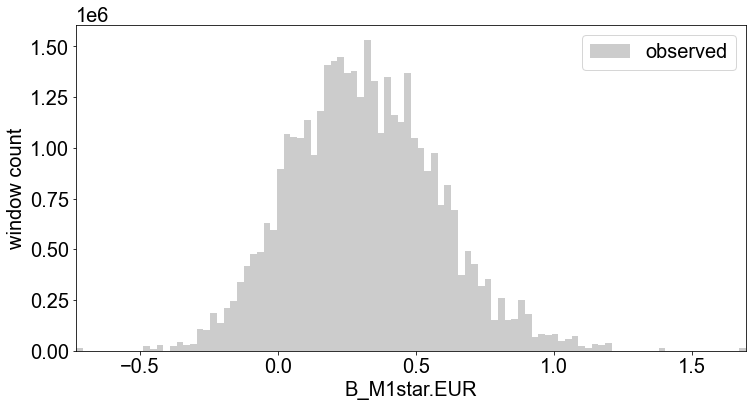

/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


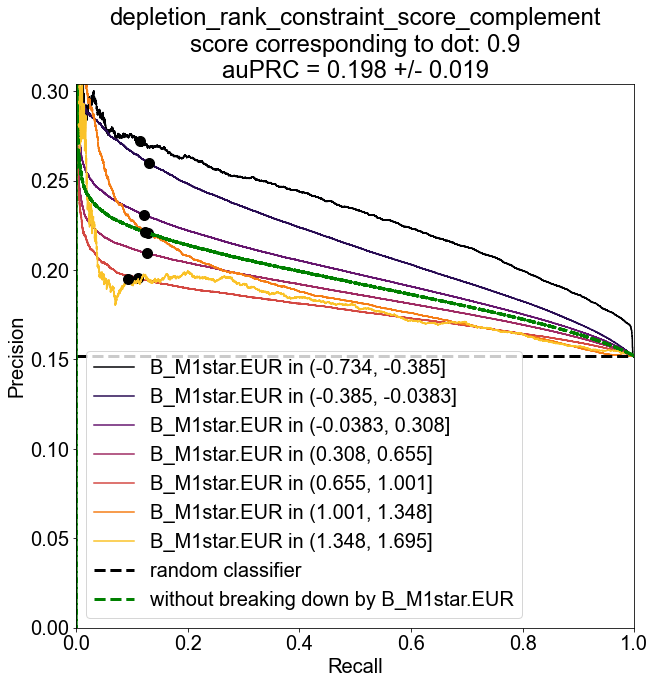

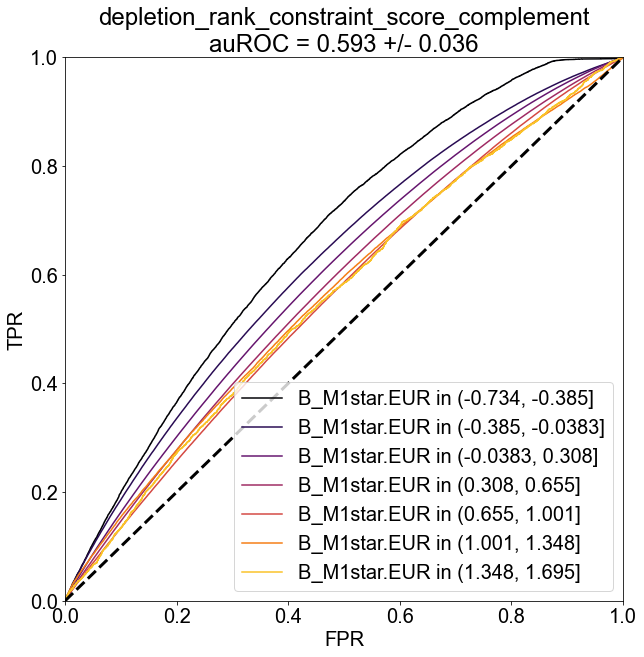

conditioning on GC_content_1000bp in [0.3802793985505721, 0.42073419235976744]
conditioning on B in [0.7765943180648358, 0.8500509136402088]
(-0.663, -0.324]: 6759
(-0.663, -0.324]: r = 0.18863737239236572; precision = 0.2647754137115839; precision/r = 1.4036211931581144; FDR = 0.7352245862884161; FDR/(1-r) = 0.9061602805841366
(-0.324, 0.0126]: 232705
(-0.324, 0.0126]: r = 0.18869813712640468; precision = 0.2771461930805629; precision/r = 1.4687277643600096; FDR = 0.7228538069194371; FDR/(1-r) = 0.8909800901468671
(0.0126, 0.349]: 885099
(0.0126, 0.349]: r = 0.18869753552992377; precision = 0.26367775731883125; precision/r = 1.397356656399029; FDR = 0.7363222426811687; FDR/(1-r) = 0.9075804338424106
(0.349, 0.685]: 602964
(0.349, 0.685]: r = 0.18869783270643023; precision = 0.24980959634424982; precision/r = 1.3238604427052176; FDR = 0.7501904036557502; FDR/(1-r) = 0.9246744725930133
(0.685, 1.022]: 94098
(0.685, 1.022]: r = 0.18869689047588684; precision = 0.23189116313273686; precis

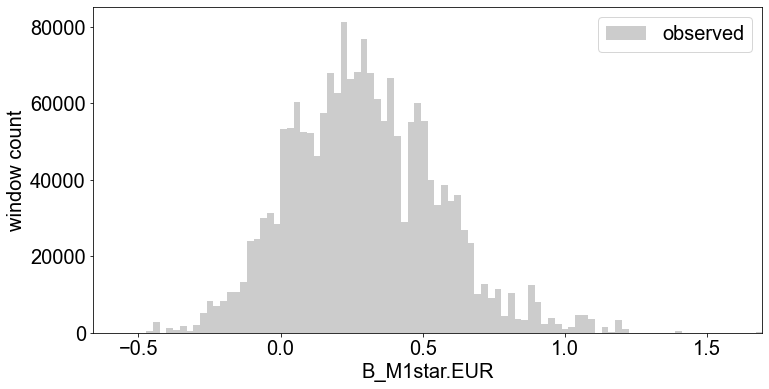

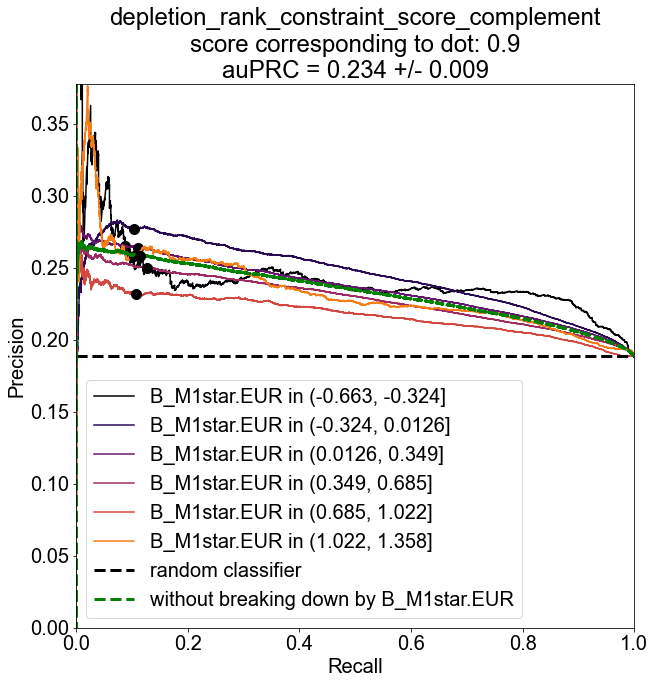

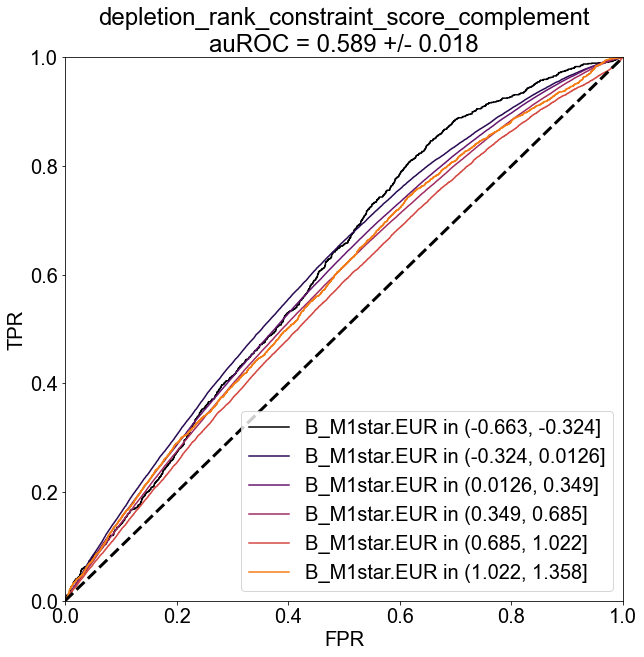

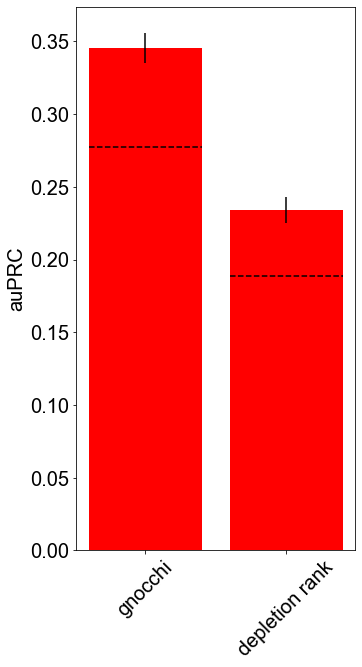

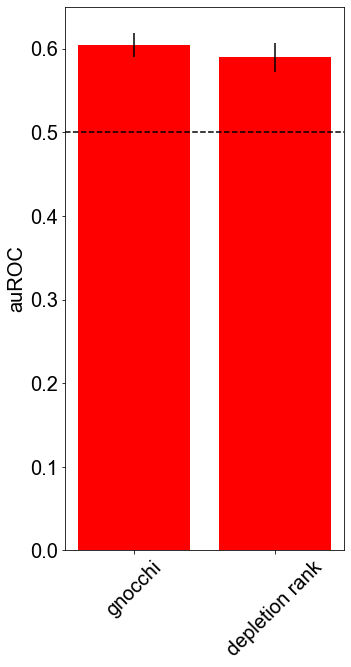

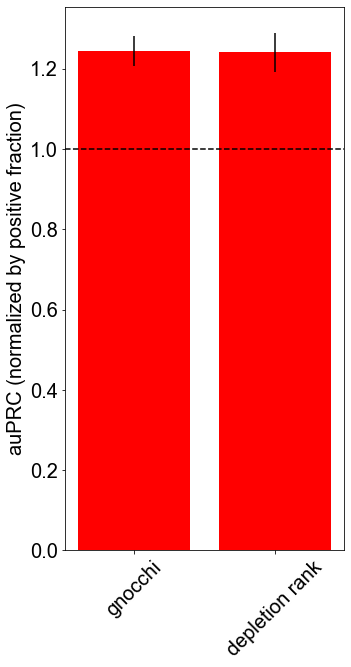

In [11]:
plot_area_under_curve_wrapper(
    gc_window_size=1000,
    feature='B_M1star.EUR',
    number_bins=7,
)

## [TODO OPT] Comparing the impact of different features on a Gnocchi-based classifier

In [12]:
def get_subset(df, feature, feature_min, feature_max, target): 
  subset = df[
    (df[feature] > feature_min) & 
    (df[feature] < feature_max)
  ]
  r = compute_positive_fraction(subset, target)
  return subset, r

def resample_subset(df, target, r, label):
  negative_class = df[df[target] == False]
  positive_class = df[df[target] == True]
  new_positive_class_size = int(r*len(negative_class)/(1-r))
  if new_positive_class_size > len(positive_class): 
    print(label)
    raise ValueError('new_positive_class_size > old_positive_class_size)')
  positive_class_downsampled = positive_class.sample(new_positive_class_size)
  df = pd.concat([positive_class_downsampled, negative_class])
  return df 

def get_full_label(label, tail_lim, cf): 
  full_label = f'{label} in {tail_lim}' if tail_lim is not None else label  
  full_label += f', conditioned on {cf}' if cf else ''
  return full_label

def plot_precision_recall_tail_all_features(
    df, 
    gc_window_size, 
    constraint_score='gnocchi', 
    target='window overlaps enhancer', 
    slice_df=False,
    constraint_score_to_plot=2
):
  subsets_and_labels_and_tail_lims_and_cfs, rs = [], []

  subsets_and_labels_and_tail_lims_and_cfs.append((df, 'all windows', None, None))
  rs.append(compute_positive_fraction(df, target))

  for feature, _, tail_lims, label in get_features_and_lims_and_labels(df, gc_window_size):
    if slice_df: 
      conditional_features_and_center_lims = [
        (f, cl) for f, cl, _, _ in get_features_and_lims_and_labels(df, gc_window_size) if f != feature
      ]
      df_sliced = slice_feature_space(df, conditional_features_and_center_lims)
      plot_feature_distribution(df_sliced, feature, xlabel=feature, lim=tail_lims, density=False)
      subset, r = get_subset(df_sliced, feature, tail_lims[0], tail_lims[1], target) 
      cf = [f for f, _ in conditional_features_and_center_lims]
    else: 
      plot_feature_distribution(df, feature, xlabel=feature, lim=tail_lims, density=False)
      subset, r = get_subset(df, feature, tail_lims[0], tail_lims[1], target)
      cf = None

    subsets_and_labels_and_tail_lims_and_cfs.append((subset, label, tail_lims, cf))
    rs.append(r)

  for subset, label, tail_lim, cf in subsets_and_labels_and_tail_lims_and_cfs: 
    fig, ax = plt.subplots(figsize=(10, 10))
    for target_value, target_color in zip([True, False], ['red', 'green']): 
      subset_conditioned_on_target = subset[subset[target] == target_value]
      ax.hist(
        subset_conditioned_on_target[constraint_score], 
        bins=50, 
        color=target_color, 
        alpha=0.7, 
        density=False, 
        label='overlaps enhancer' if target_value else 'does not overlap enhancer'
    )
    ax.set_xlabel(constraint_score)
    ax.set_ylabel('number of windows')
    ax.set_title(get_full_label(label, tail_lim, cf))
    ax.legend()
    if constraint_score == 'gnocchi': 
      ax.set_xlim(-10, 10)
    plt.show()

  r_min = min(rs)
  
  resampled_subsets_and_labels_and_tail_lims_and_cfs = [
    (resample_subset(subset, target, r_min, label), label, tail_lim, cf)
    for subset, label, tail_lim, cf in subsets_and_labels_and_tail_lims_and_cfs
  ]

  pr_curves_and_labels_and_tail_lims_and_cfs = [
    (precision_recall_curve(subset[target], subset[constraint_score]), label, tail_lim, cf) 
    for subset, label, tail_lim, cf in resampled_subsets_and_labels_and_tail_lims_and_cfs
  ]

  plt.figure(figsize=(10, 10))

  plt.plot([0, 1], [r_min, r_min], linestyle='--', linewidth=3, color='black', label='random classifier')  

  for pr_curve, label, tail_lim, cf in pr_curves_and_labels_and_tail_lims_and_cfs:
    precision, recall, thresholds = pr_curve
    plt.plot(recall, precision, label=get_full_label(label, tail_lim, cf))
    closest_score_idx = np.argmin(np.abs(thresholds - constraint_score_to_plot))
    # Plot the point on the PR curve corresponding with a threshold closest to given constraint score
    plt.plot(recall[closest_score_idx], precision[closest_score_idx], 'ko', label=None)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.xlim(0, 1)
  plt.ylim(0, 2*r_min)
  plt.title(f'black dot indicates where constraint score = {constraint_score_to_plot}')
  plt.show()

def plot_precision_recall_tail_all_features_with_and_without_slicing(
    df, 
    gc_window_size, 
    constraint_score='gnocchi', 
    target='window overlaps enhancer', 
): 
  plot_precision_recall_tail_all_features(df, gc_window_size, constraint_score, target, slice_df=False)
  plot_precision_recall_tail_all_features(df, gc_window_size, constraint_score, target, slice_df=True)

# plot_precision_recall_tail_all_features_with_and_without_slicing(WINDOWS, gc_window_size=1000)

In [13]:
# plot_precision_recall_tail_all_features_with_and_without_slicing(WINDOWS, gc_window_size=1000000)